In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Load data

In [31]:
# Load csv as dataframe
df_scores = pd.read_csv('./datasets/scores.csv')

In [32]:
# Check strucutre
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  101 non-null    float64
 1   score        101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [33]:
# See end of dataset
df_scores.tail(10)

,study_hours,score
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### (EDA) Exploratory data analysis

In [34]:
# Statistics mesuares of variables
df_scores.describe()

,study_hours,score
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='study_hours', ylabel='score'>

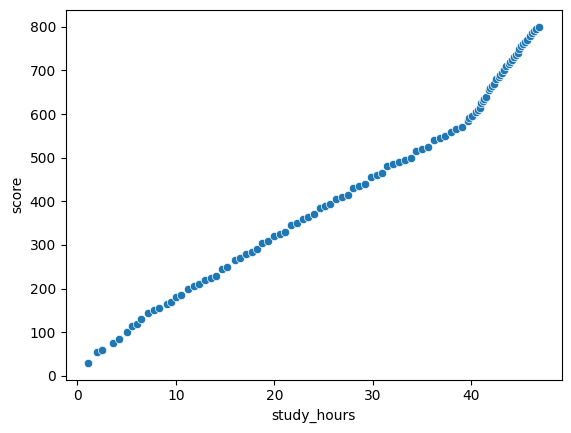

In [35]:
# Dispersion Plot (see how these variables are realated in a cartesian plan)
# X = study_hourd (independent variable)
# y = score (dependent variable)

sns.scatterplot(data=df_scores, x='study_hours', y='score')

<Axes: ylabel='study_hours'>

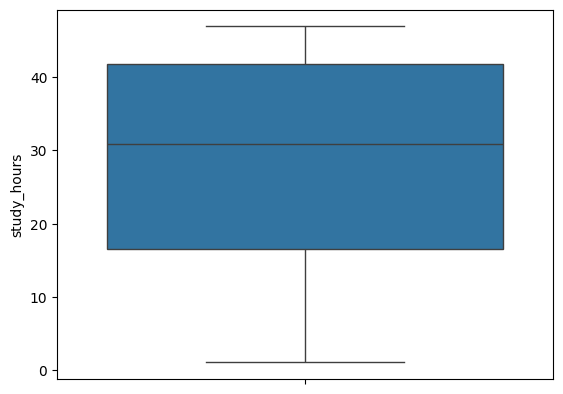

In [36]:
# Verify if we have outliers
sns.boxplot(df_scores, y='study_hours')

<Axes: ylabel='score'>

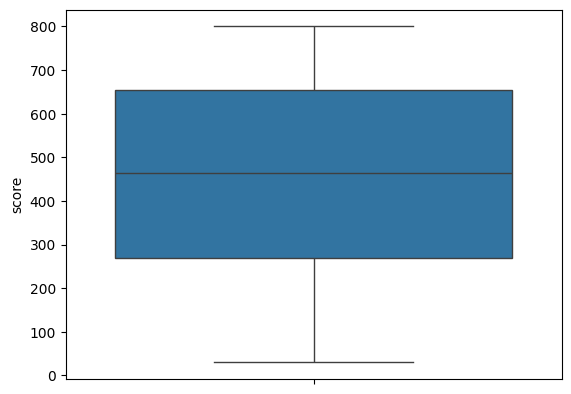

In [37]:
# Verify if we have outliers
sns.boxplot(df_scores, y='score')
# conclusion, no outliers present

<Axes: >

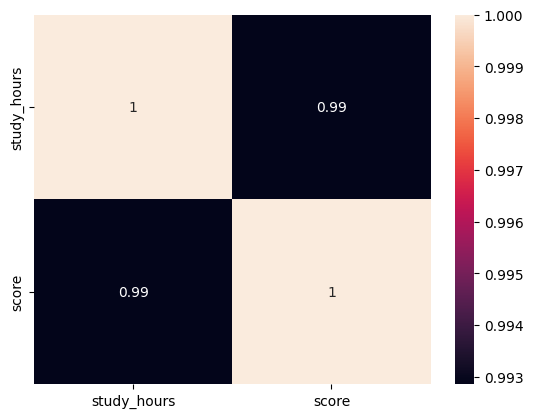

In [38]:
# Verify correlation bettwen variables (Pearson method)
sns.heatmap(df_scores.corr('pearson'), annot=True)

<Axes: >

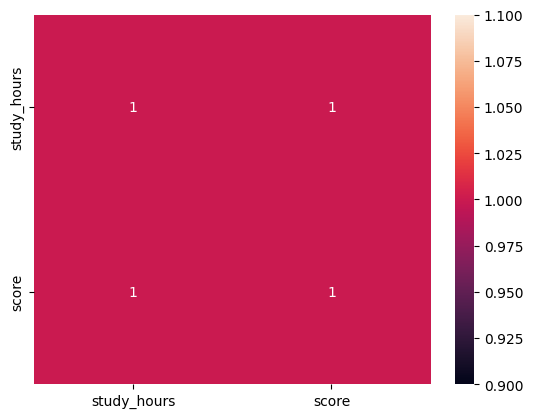

In [39]:
# Verify correlation bettwen variables (Spearman method)
sns.heatmap(df_scores.corr('spearman'), annot=True)

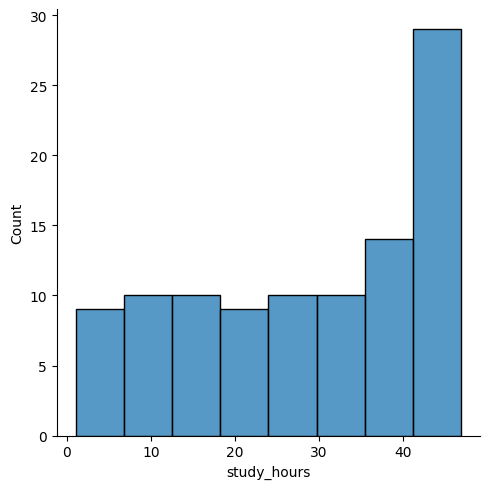

In [40]:
# Historigram
sns.displot(df_scores, x='study_hours')
# closer to the 40 hours we got a high number of data, it is exactly the point where it would scape of the straight

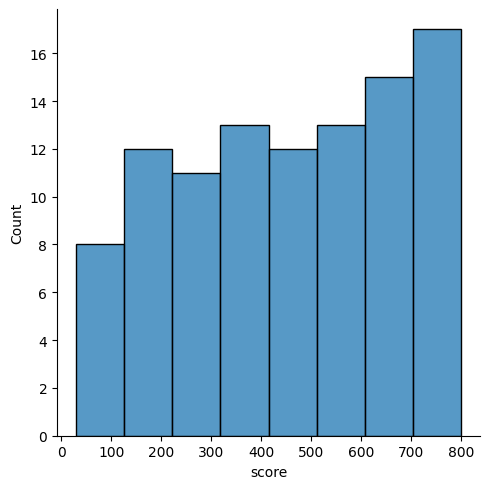

In [41]:
# Historigram
sns.displot(df_scores, x='score')
# we do not see a high diference betwen values

## Train model

In [42]:
# 1. Divide dataset betwen test and train
# When we have just a feature, we need to adjust the shape
X = df_scores['study_hours'].values.reshape(-1, 1)
y = df_scores['score'].values.reshape(-1, 1)

#X -> receive independent variables of test and train
#X -> receive dependent variables of test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [43]:
# 2. Instantiate model to be trained
reg_model = LinearRegression()

In [44]:
# 3. Train model
# fit -> takes the train dataset and train the model based on it
reg_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# What would be the line that represents the model just trained
# y = aX + b
print("Line equation: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Line equation: y = 15.642619x + 8.476601


## Validate model - metrics

In [46]:
# 1. Predict values based on tests dataset
y_pred = reg_model.predict(X_test)

In [47]:
# 2. Calc metric - R-squared (Coeficiente de determincação)
# R2 - Repersents proportion of variation in the dependent variable, wich is explained by the independent variable
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, y_pred)

0.9828400452912442

In [48]:
# 3. Error metric MAE - Mean absolute error
# Difference betwen predicted value and test value
# MAE = Average (y_test - y_pred) - less sensitive to outliers

mean_absolute_error(y_test, y_pred)

22.957470277134615

In [49]:
# 4. Calc MSE (Mean squared error)
# MSE = Average (y_test - y_pred)²
# Not easy to interpret, more sensitive to outliers
mean_squared_error(y_test, y_pred)

766.9972992416427

In [50]:
# 4. Calc RMSE (Root Mean squared error)
# MSE = Root(Average (y_test - y_pred)²)
# Not easy to interpret, more sensitive to outliers
mean_squared_error(y_test, y_pred, squared=False)

27.69471608884342

## Graphical analisys

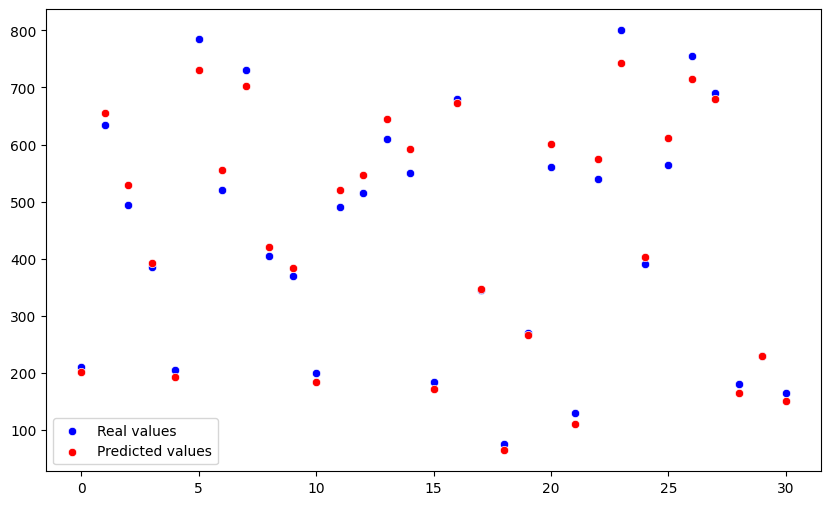

In [51]:
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Real values')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Predicted values')
plt.legend()
plt.show()

## Residual analisys

In [52]:
# Calc residue
# residue -> (real - predicted)
residue = y_test - y_pred

In [53]:
# Calc standard residue (standarddization)
# (X - average) / standard deviation
from scipy.stats import zscore
residue_std = zscore(residue)

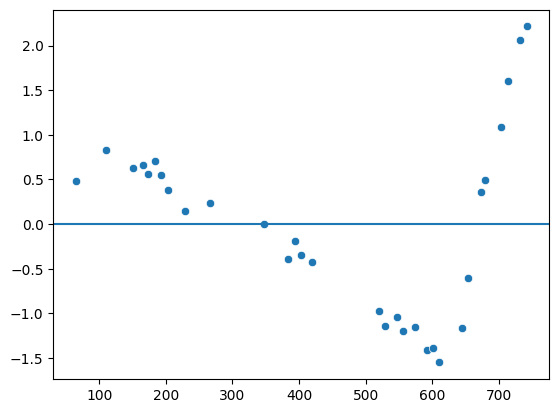

In [54]:
# Check linearity of the model
# if residue betwen -2 and +2 - shows linearity

# Check hogeneity of residual variances (homoscedasticity)
# If the values ​​are around the straight line, we have homoscedasticity

sns.scatterplot(x=y_pred.reshape(-1), y=residue_std.reshape(-1))
plt.axhline(y=0)

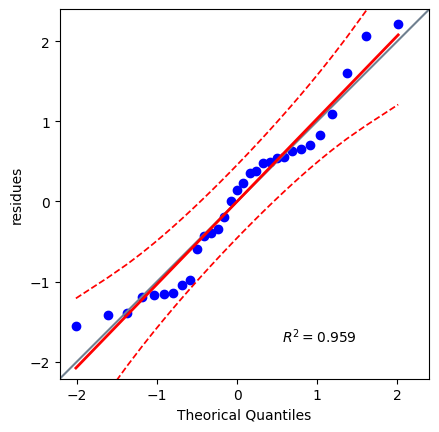

In [55]:
# Check if residue follow a normal distribution
# QQ (Quantile-Quantile) Plot -> se if a dataset follow a notmal distribution
import pingouin as pg 
pg.qqplot(residue_std, dist='norm', confidence=0.95)
plt.xlabel('Theorical Quantiles')
plt.ylabel('residues')
plt.show()

## Normality tests

In [57]:
# Shapiro Wilk
# H0 - Follow normal distribution
# H1 - Does NOT follow a normal distribution
# if p-value > 0.05 -> do not reject H0, else, reject

stat_shapiro, p_value_shapiro = shapiro(residue.reshape(-1))
print("Test statistics: {} and p-value: {}".format(stat_shapiro, p_value_shapiro))

Test statistics: 0.9500530362129211 and p-value: 0.15663613379001617


In [59]:
# Kolmogorov-Smirnov
# H0 - Follow normal distribution
# H1 - Does NOT follow a normal distribution
# if p-value > 0.05 -> do not reject H0, else, reject

stat_ks, p_value_ks = kstest(residue.reshape(-1), 'norm')
print("Test statistics: {} and p-value: {}".format(stat_ks, p_value_ks))

Test statistics: 0.48355808450512827 and p-value: 3.395368995814077e-07
